In [369]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import random
from sklearn.utils import shuffle
from sklearn.svm import OneClassSVM
plt.rcParams['figure.figsize'] = [35, 35]

In [370]:
df = pd.read_csv('spambase.data', sep=",", header = None)

In [371]:
#view sample
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [372]:
# inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [373]:
#check value counts of dependent variable
df[57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

In [374]:
#create test, train splits
#x = np.array(df.iloc[:,:-1].values
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [375]:
print("the x value array shape is: " + str(x.shape))
print("the y value array shape is: " + str(y.shape))

the x value array shape is: (4601, 57)
the y value array shape is: (4601,)


In [376]:
# use sklearn test train split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [377]:
# View + Test X dataset size
print("X Train dataset size is: " + str(X_train.shape[0]))
print("X Test dataset size is: " + str(X_test.shape[0]))
assert (X_test.shape[0] + X_train.shape[0]) == x.shape[0]

X Train dataset size is: 3680
X Test dataset size is: 921


In [378]:
# View + Test Y dataset size
print("Y Train dataset size is: " + str(y_train.shape[0]))
print("Y Test dataset size is: " + str(y_test.shape[0]))
assert (y_test.shape[0] + y_train.shape[0]) == y.shape[0]

Y Train dataset size is: 3680
Y Test dataset size is: 921


## Decision Tree

In [379]:
#source https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = DecisionTreeClassifier(max_depth = 50)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [380]:
CART_error = 1-clf.score(X_test,y_test)
# accuracy
print("The precision of decision tree classifier is: " + str(clf.score(X_test,y_test)))

The precision of decision tree classifier is: 0.9087947882736156


In [381]:
print(CART_error)

0.0912052117263844


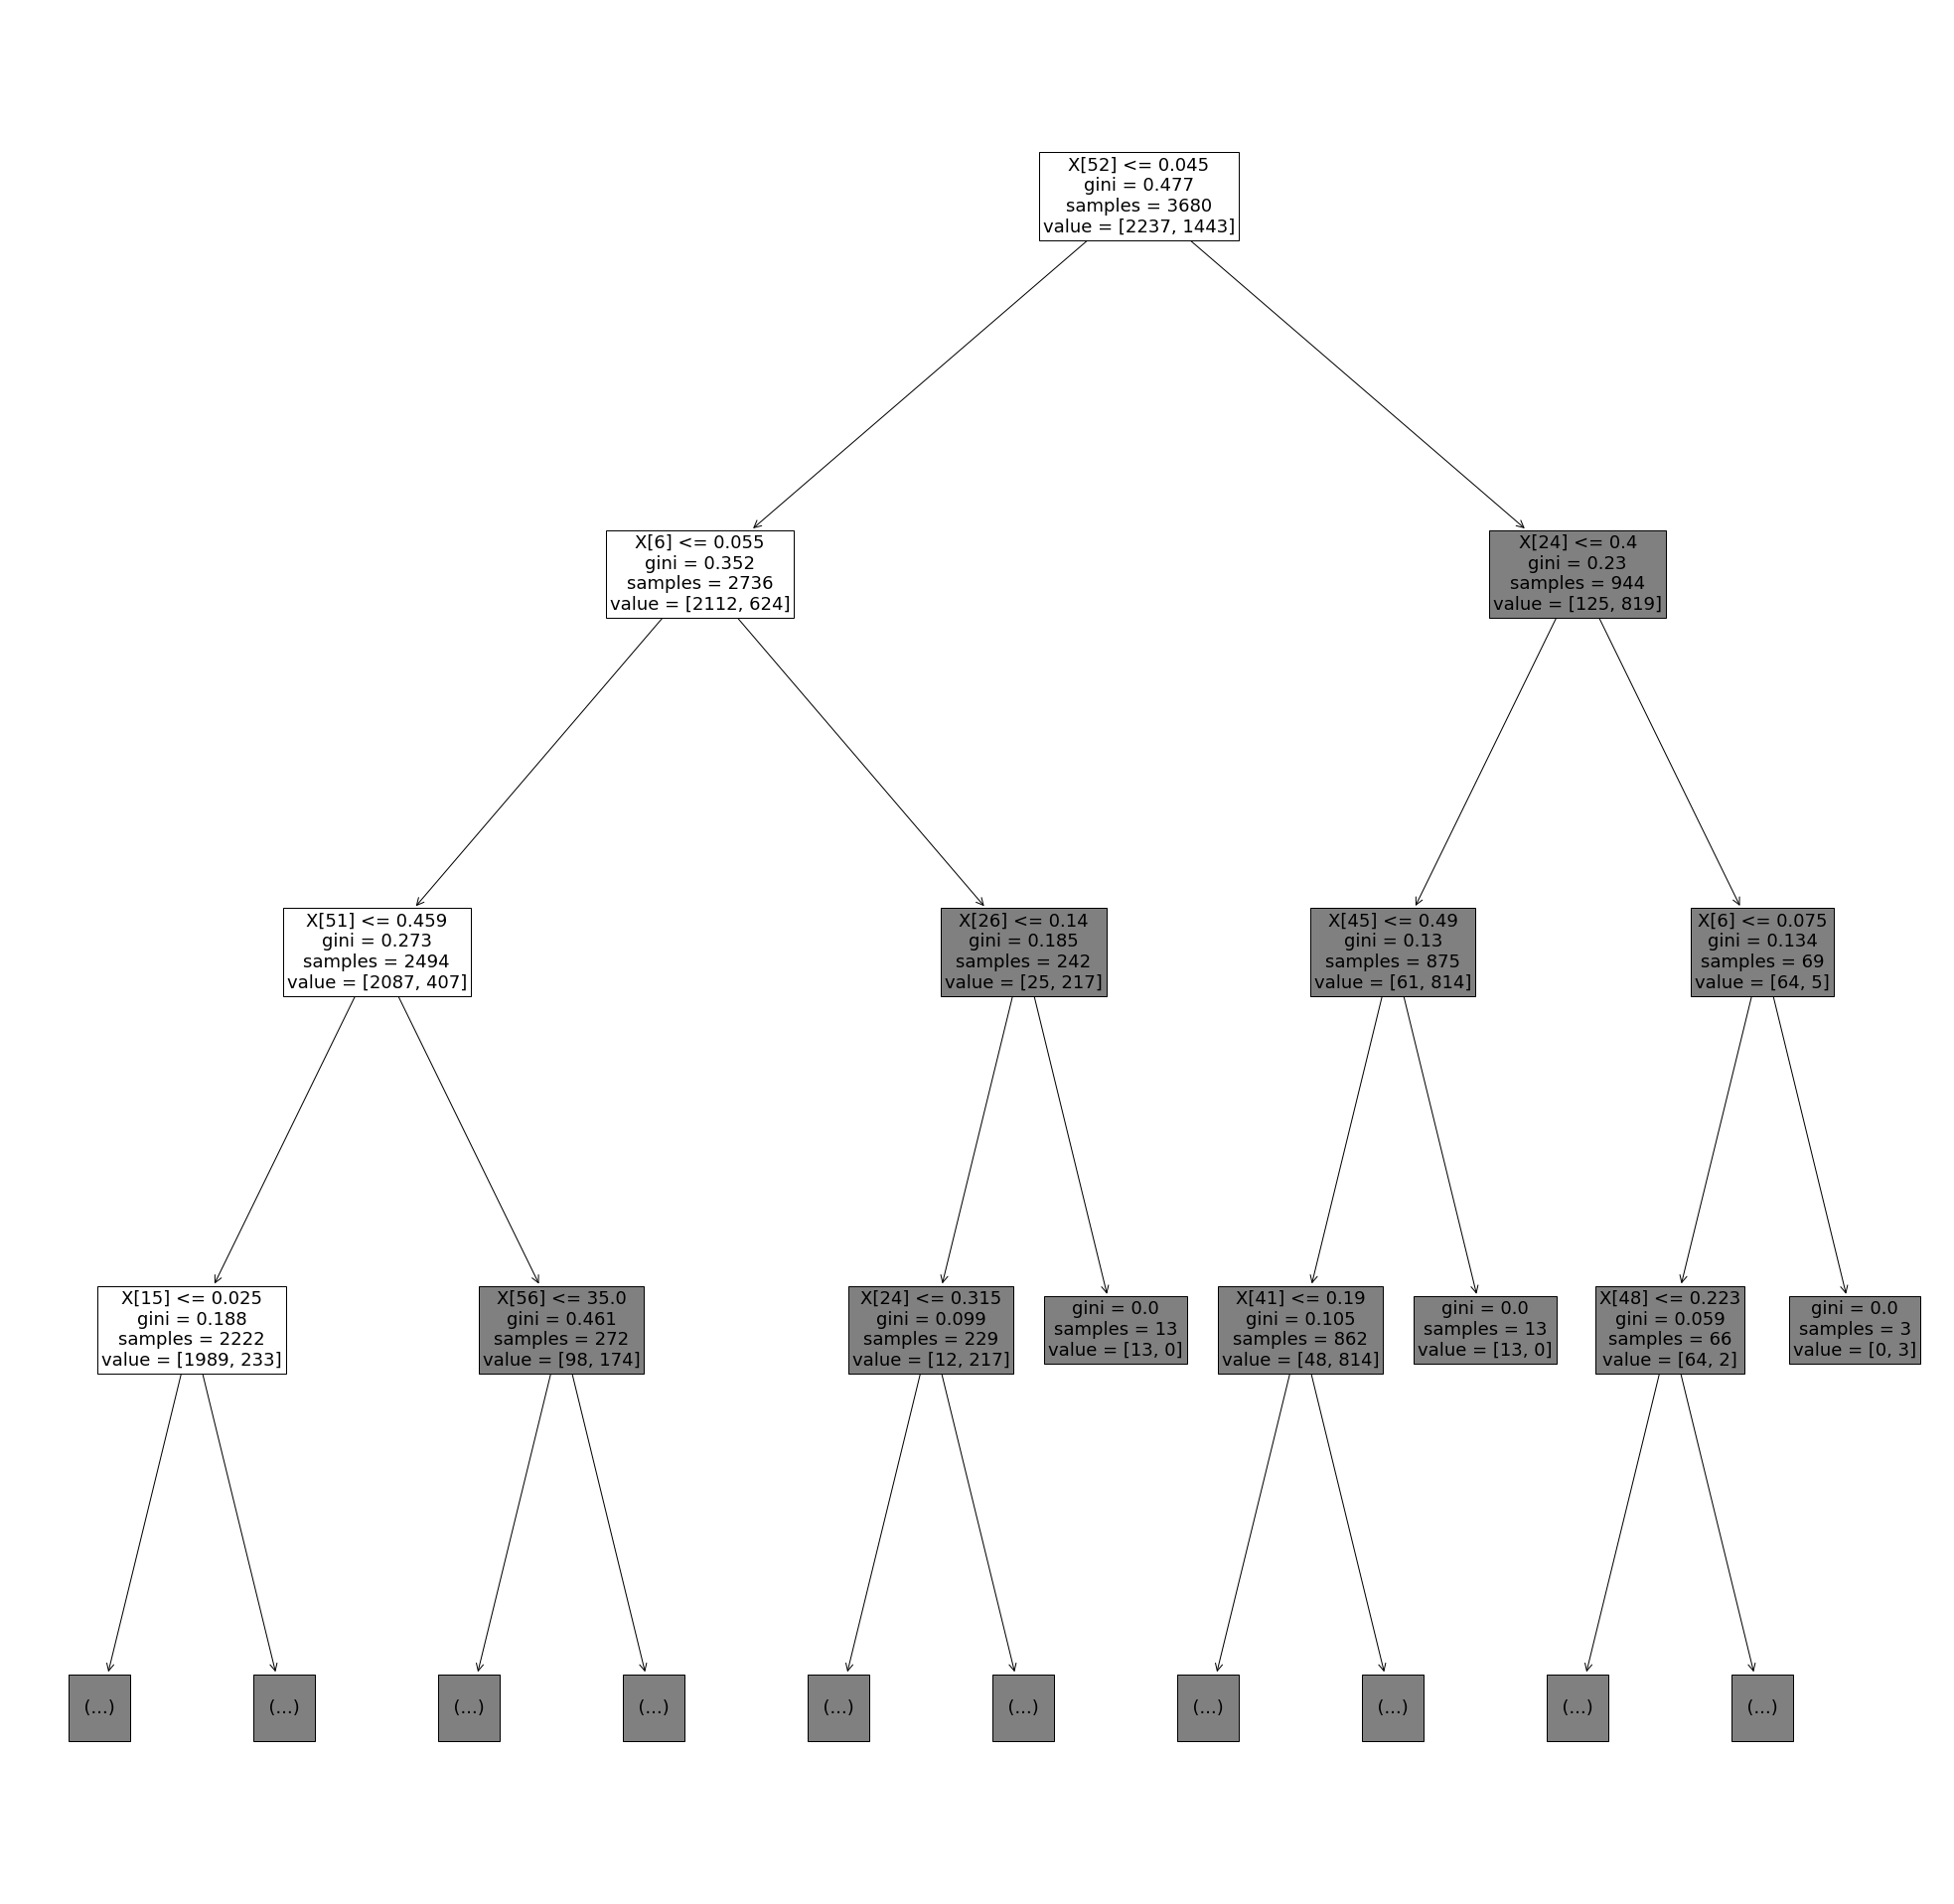

In [382]:
#decision tree plot
#source https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
#source 
plot = tree.plot_tree(clf,max_depth=3, fontsize = 18)

In [383]:
#decision tree plot 2
#source https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
#plot = tree.export_graphviz(clf)
#plot

## Random Forest

In [384]:
x, y = shuffle(x, y, random_state=5)
print(x)
print(y)

[[ 0.51   0.     0.51  ...  1.885 12.    66.   ]
 [ 0.     0.     0.    ...  1.5    3.    12.   ]
 [ 0.     0.     2.5   ...  1.222  3.    11.   ]
 ...
 [ 0.     0.     3.    ...  1.428  3.    20.   ]
 [ 0.     0.     0.    ...  1.     1.     5.   ]
 [ 0.     0.     0.    ...  3.454 11.    38.   ]]
[0 0 0 ... 0 0 0]


In [385]:
# use sklearn test train split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [386]:
misclass_error_rate = []
for i in range(1,101):
    r_clf = RandomForestClassifier(max_depth = 50, n_estimators = i, random_state = 5)
    r_clf.fit(X_train,y_train)
    precision = r_clf.score(X_test,y_test)
    error_rate = 1-precision
    misclass_error_rate.append(error_rate)

In [387]:
# create constant value of CART misclass error
CART_error_rates = []
for i in range(1,101):
    CART_error_rates.append(CART_error)

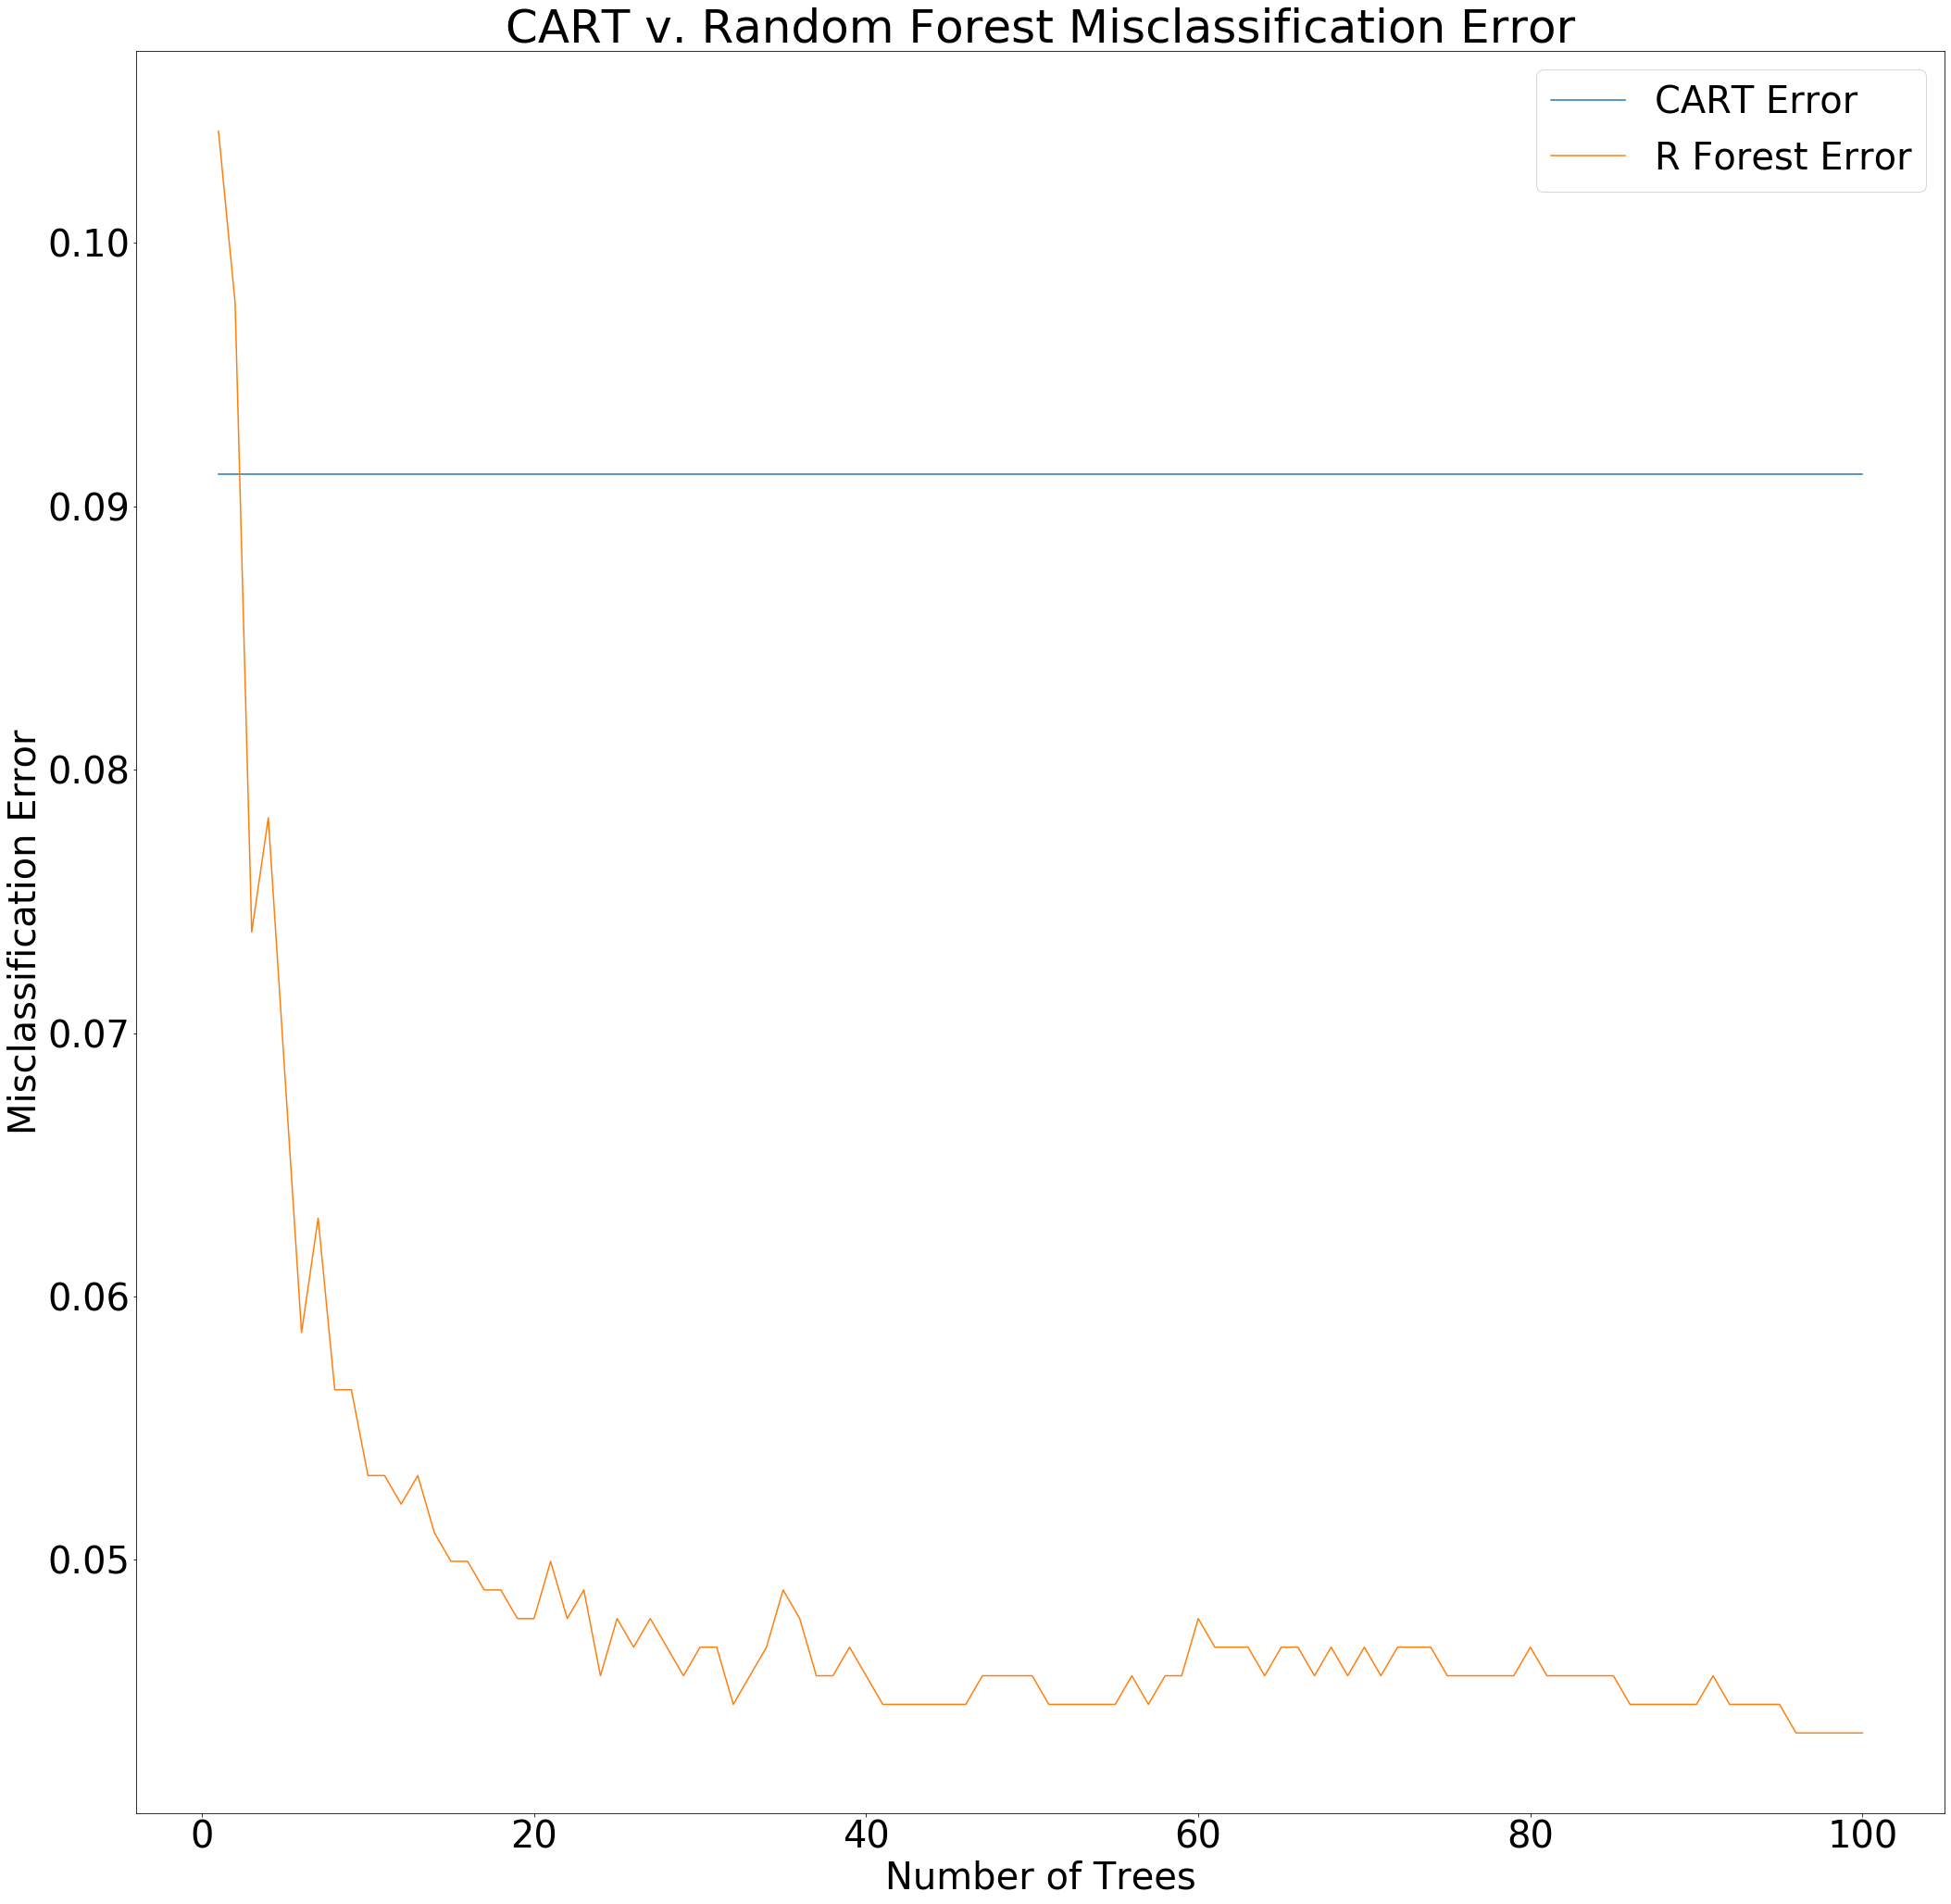

In [388]:
x_range = list(range(1,101))
plt.plot(x_range,CART_error_rates, label = "CART Error")
plt.plot(x_range,misclass_error_rate, label = "R Forest Error")
plt.title('CART v. Random Forest Misclassification Error')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error')
plt.rc('font', size=40) 
plt.rc('axes', titlesize=50) 
plt.show()

## Using OOB Scores

In [389]:
misclass_error_rates = []
oob_error_rates = []
for i in range(5,51):
    r_clf = RandomForestClassifier(max_depth = 50,bootstrap =True,oob_score=True, max_features = i, random_state = 5)
    r_clf.fit(X_train,y_train)
    precision = r_clf.score(X_test,y_test)
    error_rate = 1-precision
    misclass_error_rates.append(error_rate)
    oob_rate = r_clf.oob_score_
    oob_error_rate = 1-oob_rate
    oob_error_rates.append(oob_error_rate)
    

In [390]:
print("Misclass Errors Length: " + str(len(misclass_error_rates)))
print("OOB Errors Length: " + str(len(oob_error_rates)))

Misclass Errors Length: 46
OOB Errors Length: 46


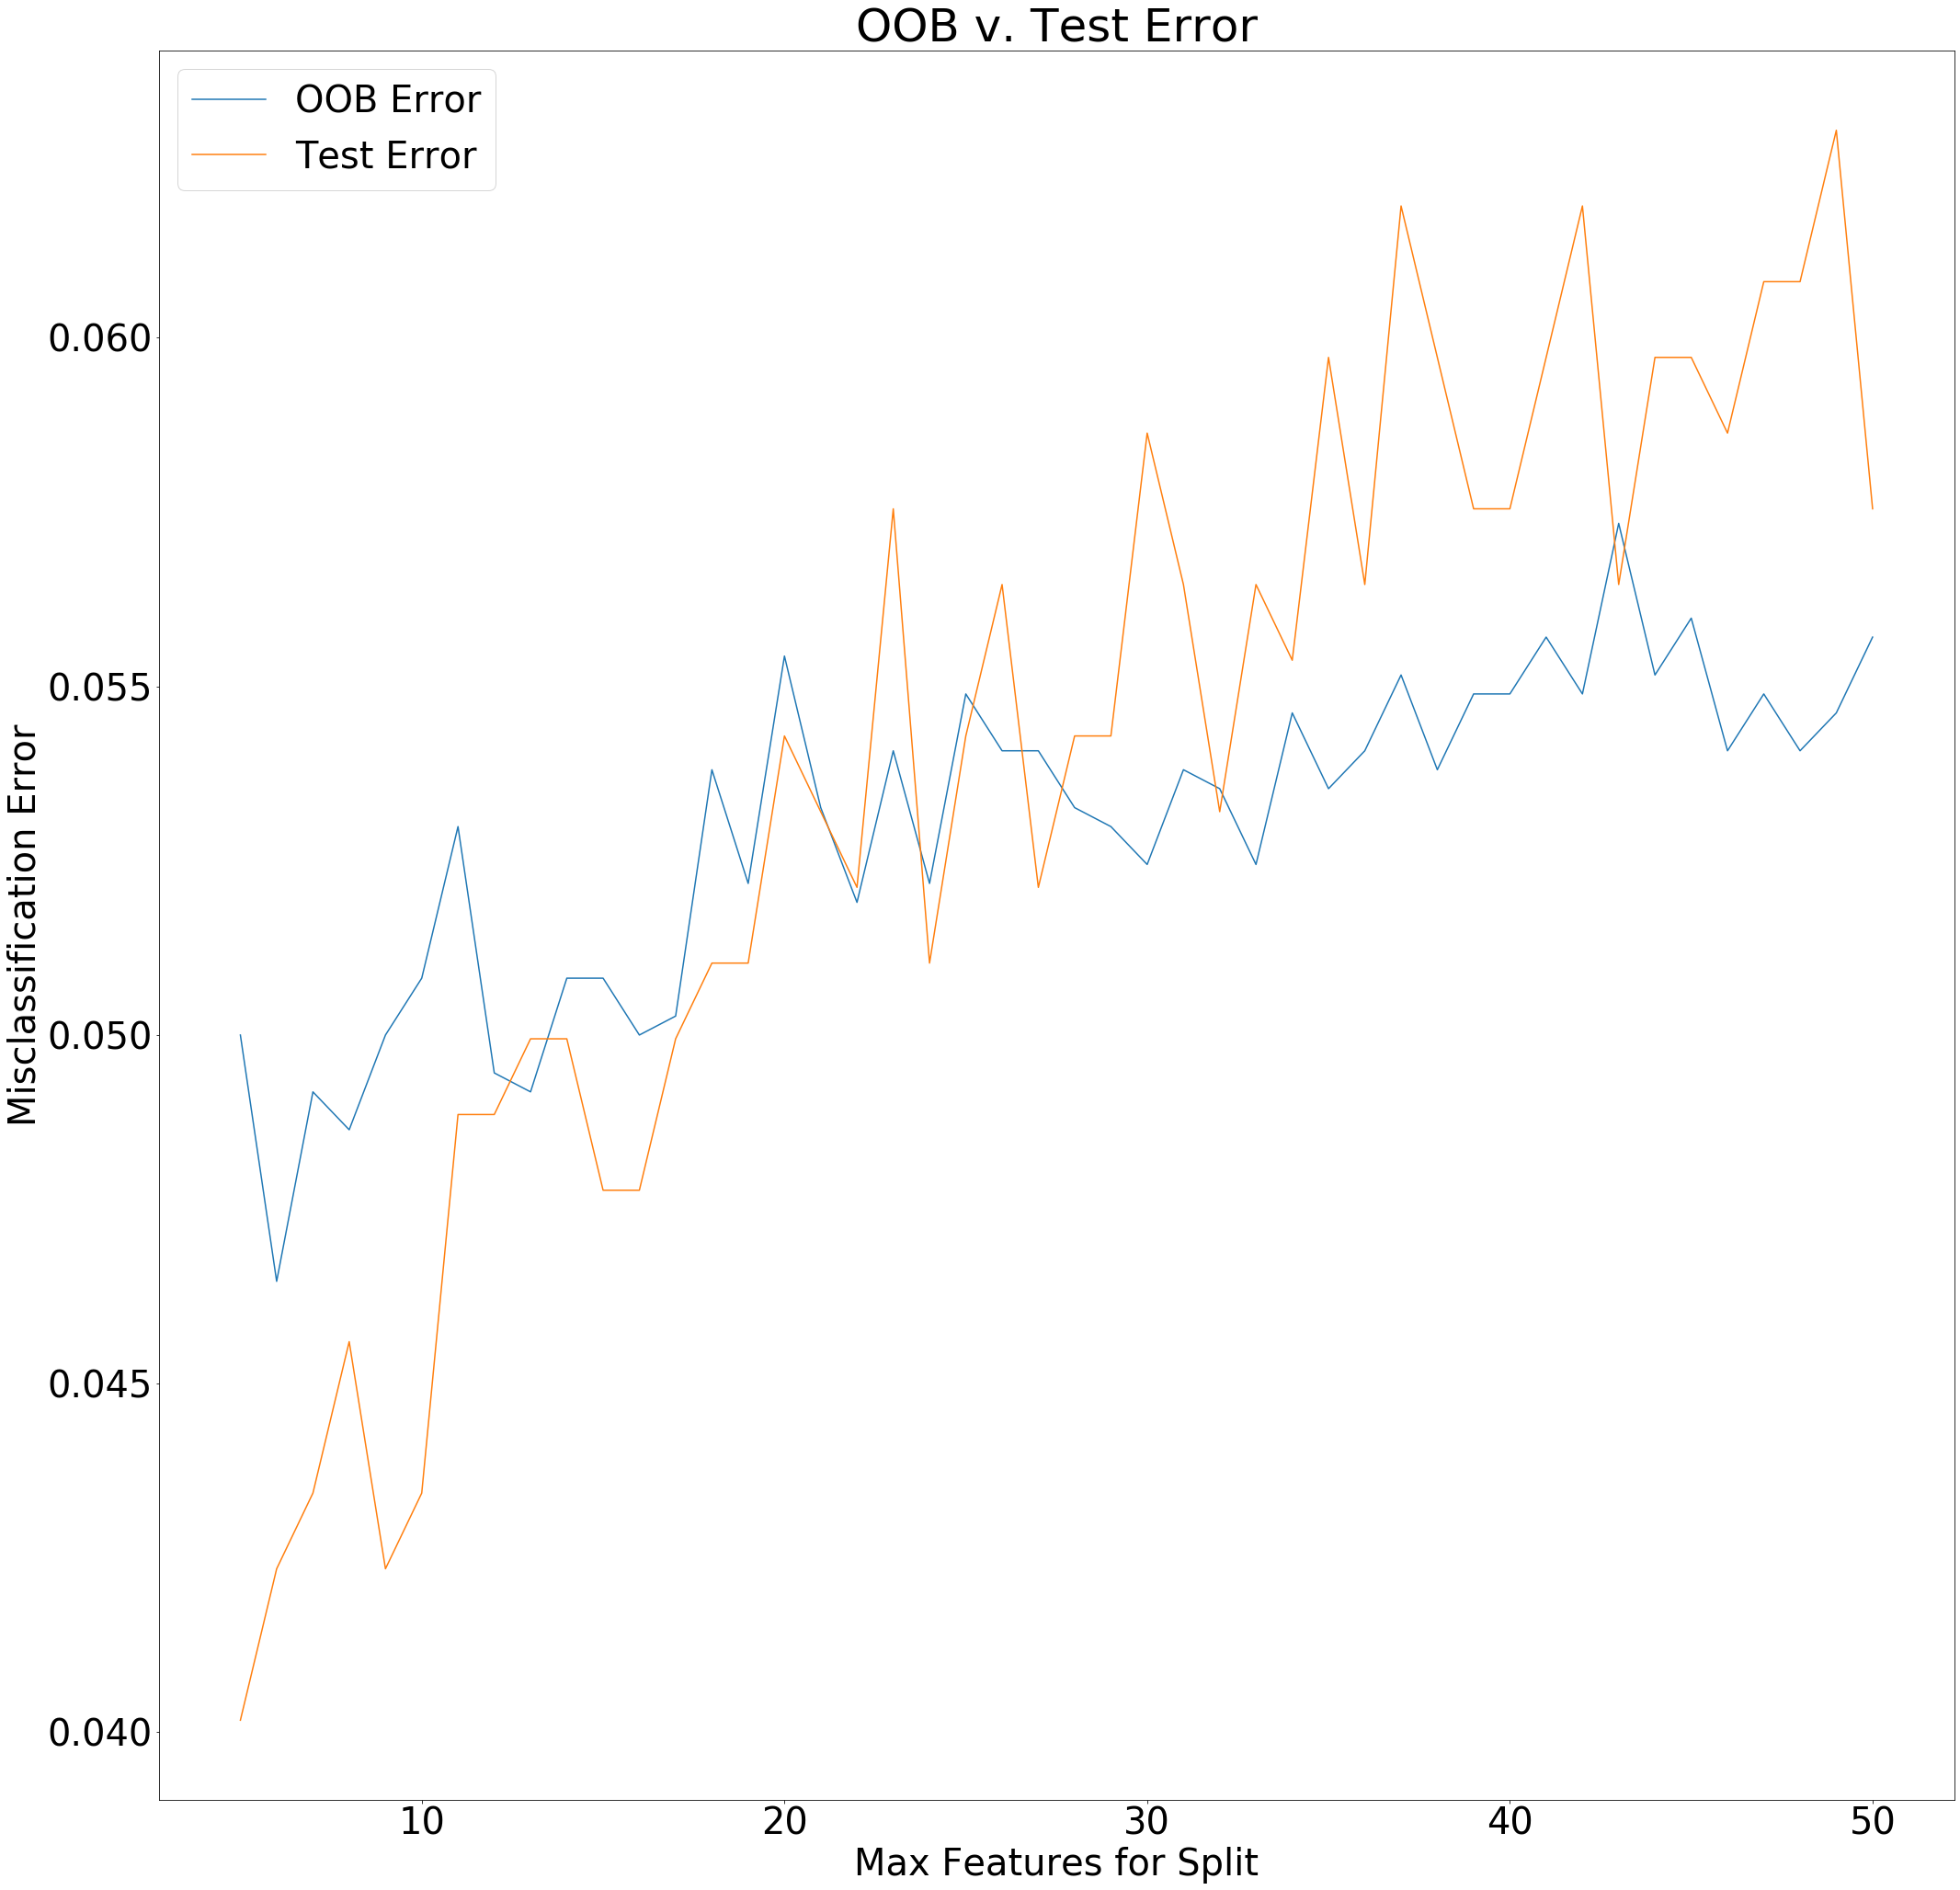

In [391]:
x_range = list(range(5,51))
plt.plot(x_range,oob_error_rates, label = "OOB Error")
plt.plot(x_range,misclass_error_rates, label = "Test Error")
plt.title('OOB v. Test Error')
plt.legend()
plt.xlabel('Max Features for Split')
plt.ylabel('Misclassification Error')
plt.rc('font', size=40) 
plt.rc('axes', titlesize=50) 
plt.show()

## One Class SVM

In [425]:
#Source: https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html
x, y = shuffle(x, y, random_state=5)

In [426]:
# use sklearn test train split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [427]:
X_train_nonspam = X_train[y_train == 0]

In [461]:
clf = OneClassSVM(kernel = 'rbf', gamma = 'auto').fit(X_train_nonspam)

In [466]:
y_test_pred = clf.predict(X_test)
print(len(y_test_pred))
print(y_test_pred)


1381
[-1  1 -1 ... -1  1 -1]


In [463]:
y_test_pred[y_test_pred == 1] = 0 #nonspam
y_test_pred[y_test_pred == -1] = 1 #spam

In [464]:
test_error = sum(y_test_pred != y_test)/len(y_test)
print('One Class SVM Test Error: ',test_error)

One Class SVM Test Error:  0.3490224475018103
